In [1]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%autoreload 2
import sys
sys.path.insert(1, '../../SyMBac/')
from matplotlib.ticker import MaxNLocator

from matplotlib import rc
rc('text', usetex=True)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile
from microfilm.colorify import cmaps_def
import scipy
import scienceplots
from seaborn import move_legend
from copy import deepcopy
from matplotlib.colors import LogNorm, Normalize
plt.style.use('nature')

matplotlib.rcParams["xtick.minor.bottom"]=True
matplotlib.rcParams["xtick.top"]=False
matplotlib.rcParams["ytick.minor.left"]=True
matplotlib.rcParams["ytick.right"]=False
matplotlib.rcParams["font.size"] = 6
#matplotlib.rcParams["axes.labelpad"] = 0
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["xtick.minor.visible"] = True
matplotlib.rcParams["ytick.minor.visible"] = True
matplotlib.rcParams["xtick.direction"] = "out"
matplotlib.rcParams["ytick.direction"] = "out"
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["ytick.labelsize"] = 6
matplotlib.rcParams["axes.titlesize"] = 6
matplotlib.rcParams["axes.labelsize"] = 6
matplotlib.rcParams["grid.alpha"] = 0
matplotlib.rcParams["savefig.transparent"] = True


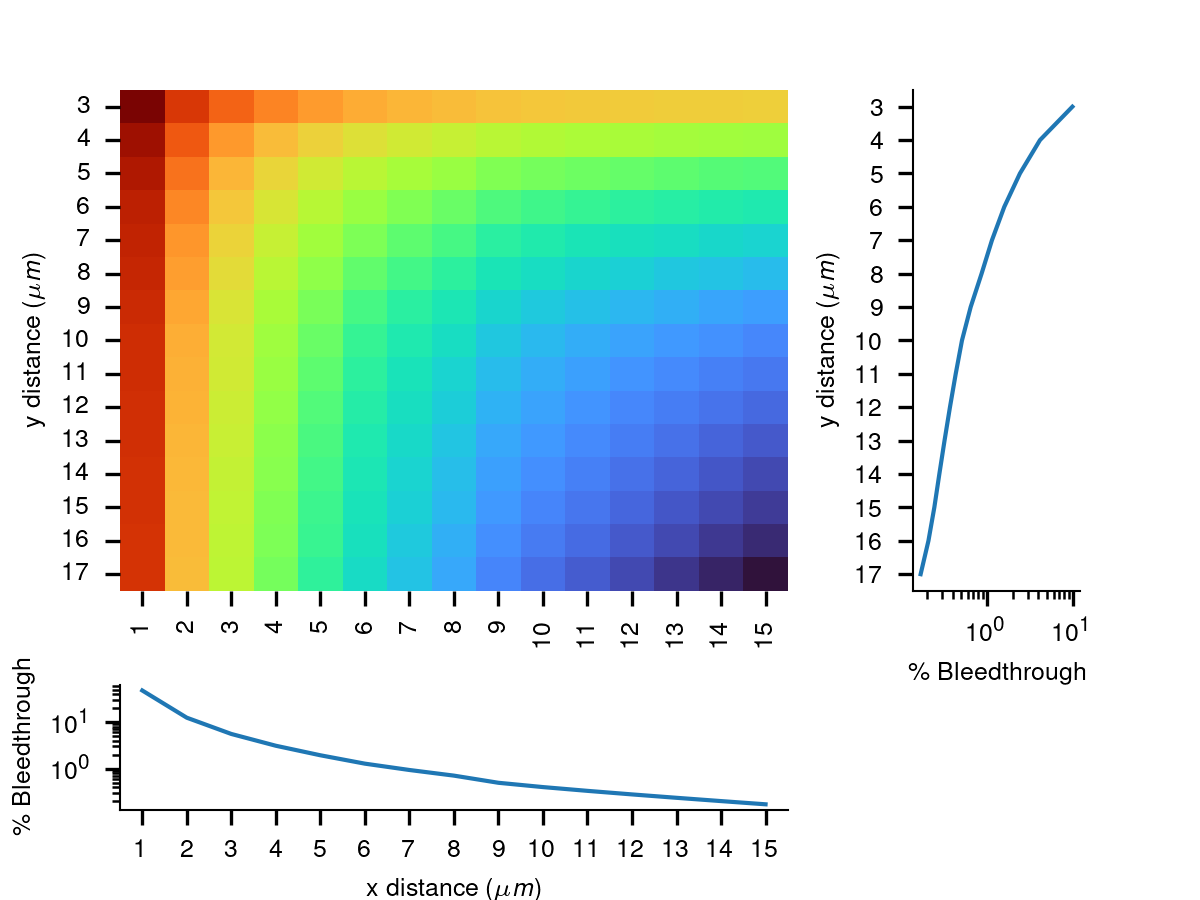

In [2]:
# Start with a square Figure.
mid_df = pd.read_pickle("../../cell_distance_bleedthrough/lorentzian_convolution.pickle")
mid_df["x"] += 1
mid_df["y"] += 3
#mid_top_df.to_pickle("lorentzian_convolution_mid_top.pickle")
# Create a 2D array initialized with NaNs
unique_x = np.sort(mid_df['x'].unique())
unique_y = np.sort(mid_df['y'].unique())
heatmap_data = np.empty((len(unique_x), len(unique_y)))
heatmap_data[:] = np.nan

# Populate 2D array with your data
for row in mid_df.itertuples():
    x_idx = np.where(unique_x == row.x)[0][0]
    y_idx = np.where(unique_y == row.y)[0][0]
    heatmap_data[x_idx, y_idx] = row.data * 100

# Transpose the 2D array
heatmap_data_transposed = heatmap_data.T
vmax = heatmap_data_transposed.max()
vmin = heatmap_data_transposed.min()
fig = plt.figure(figsize=(4, 3), dpi = 300)

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.3, hspace=0.3)
# Create the Axes.
heatmap = fig.add_subplot(gs[0, 0])

# Create the heatmap with cbar but do not use gridspec
sns.heatmap(heatmap_data_transposed, xticklabels=unique_x, yticklabels=unique_y,norm=LogNorm(), cmap='turbo', ax = heatmap, cbar=False)
x_ticks = np.arange(0, len(unique_x), 1)
y_ticks = np.arange(0, len(unique_y), 1)

heatmap.set_xticklabels(unique_x.astype(int))
heatmap.set_yticklabels(unique_y.astype(int))

heatmap.set_ylabel('y distance ($\mu m$)')
heatmap.tick_params(axis='x', which='minor', size=0)
heatmap.tick_params(axis='y', which='minor', size=0)

plot_y = fig.add_subplot(gs[0, 1], sharey=heatmap)
plot_y.plot(heatmap_data_transposed[:,-1], np.arange(0.5,len(heatmap_data_transposed[:,-1])+0.5))
#plot_y.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False)
plot_y.set_xlabel('$\%$ Bleedthrough')
plot_y.set_xscale("log")
plot_y.tick_params(axis="y", which="minor", size=0)
plot_y.set_ylabel('y distance ($\mu m$)')

plot_x = fig.add_subplot(gs[1, 0], sharex=heatmap)
plot_x.plot(np.arange(0.5,len(heatmap_data_transposed[:,-1])+0.5), heatmap_data_transposed[-1,:] )
plot_x.set_xlabel('x distance ($\mu m$)')
plot_x.set_ylabel('$\%$ Bleedthrough')
plot_x.tick_params(axis="x", which="minor", size=0)
plot_x.set_yscale("log")
plt.savefig("a.svg")


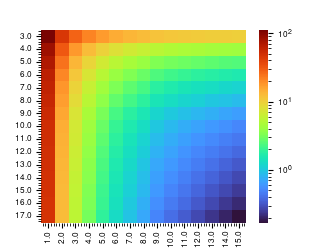

In [3]:
# Create the heatmap with cbar but do not use gridspec
sns.heatmap(heatmap_data_transposed, xticklabels=unique_x, yticklabels=unique_y,norm=LogNorm(), cmap='turbo')
plt.savefig("cbar.svg")

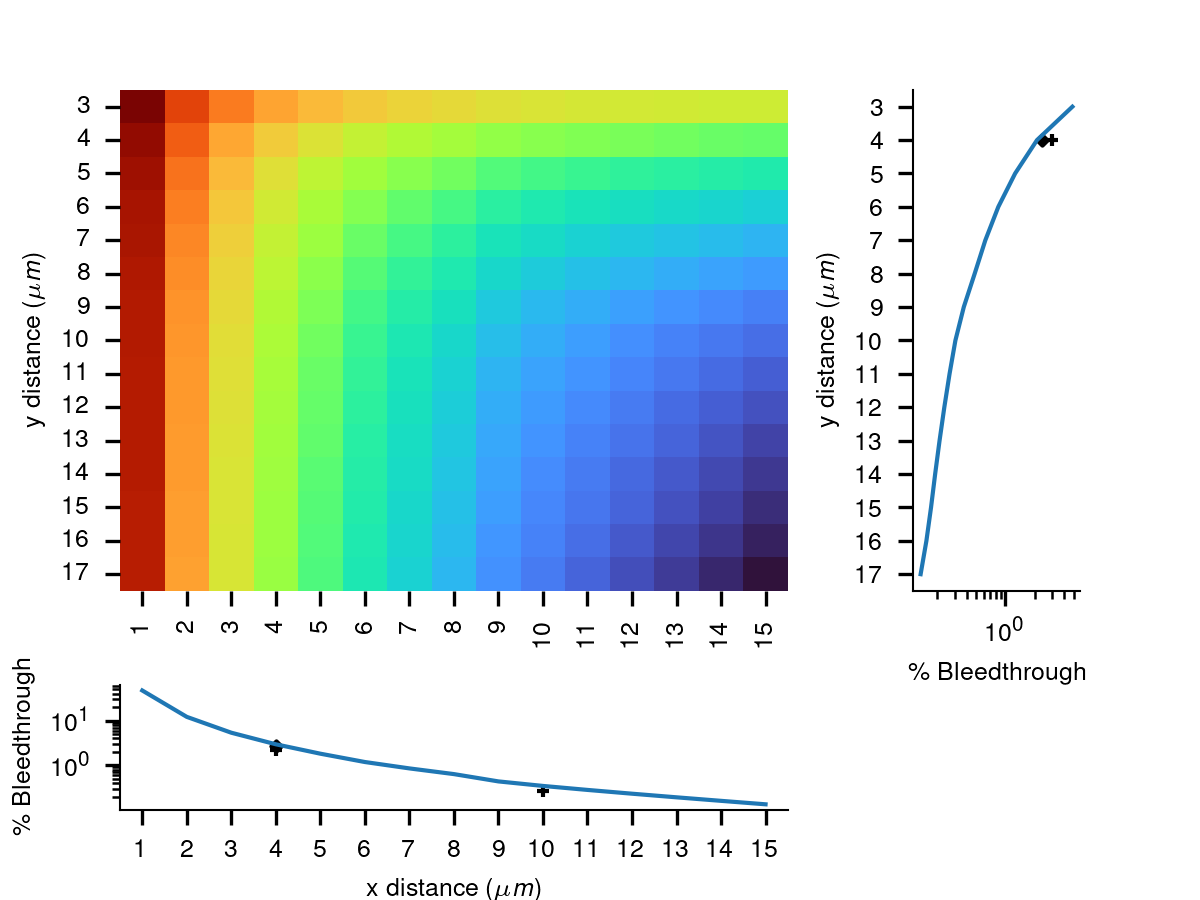

In [4]:
# Start with a square Figure.
mid_top_df = pd.read_pickle("../../cell_distance_bleedthrough/lorentzian_convolution_mid_top.pickle")
mid_top_df["x"] += 0
mid_top_df["y"] += 2
#mid_top_df.to_pickle("lorentzian_convolution_mid_top.pickle")
# Create a 2D array initialized with NaNs
unique_x = np.sort(mid_top_df['x'].unique())
unique_y = np.sort(mid_top_df['y'].unique())
heatmap_data = np.empty((len(unique_x), len(unique_y)))
heatmap_data[:] = np.nan

# Populate 2D array with your data
for row in mid_top_df.itertuples():
    x_idx = np.where(unique_x == row.x)[0][0]
    y_idx = np.where(unique_y == row.y)[0][0]
    heatmap_data[x_idx, y_idx] = row.data * 100

# Transpose the 2D array
heatmap_data_transposed = heatmap_data.T
fig = plt.figure(figsize=(4, 3), dpi = 300)

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.3, hspace=0.3)
# Create the Axes.
heatmap = fig.add_subplot(gs[0, 0])

# Create the heatmap with cbar but do not use gridspec
sns.heatmap(heatmap_data_transposed, xticklabels=unique_x, yticklabels=unique_y,norm=LogNorm(), cmap='turbo', ax = heatmap, cbar=False, vmax = vmax, vmin = vmin)
x_ticks = np.arange(0, len(unique_x), 1)
y_ticks = np.arange(0, len(unique_y), 1)

heatmap.set_xticklabels(unique_x.astype(int))
heatmap.set_yticklabels(unique_y.astype(int))

heatmap.set_ylabel('y distance ($\mu m$)')
heatmap.tick_params(axis='x', which='minor', size=0)
heatmap.tick_params(axis='y', which='minor', size=0)

plot_y = fig.add_subplot(gs[0, 1], sharey=heatmap)
plot_y.plot(heatmap_data_transposed[:,-1], np.arange(0.5,len(heatmap_data_transposed[:,-1])+0.5))
#plot_y.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False)
plot_y.set_xlabel('$\%$ Bleedthrough')
plot_y.set_xscale("log")
plot_y.tick_params(axis="y", which="minor", size=0)
plot_y.set_ylabel('y distance ($\mu m$)')
plot_y.scatter([3],[1.5], c = "k", marker = "+")
plot_y.scatter([2.35],[1.5], c = "k", marker = "D", s = 3) #erez data

plot_x = fig.add_subplot(gs[1, 0], sharex=heatmap)
plot_x.plot(np.arange(0.5,len(heatmap_data_transposed[:,-1])+0.5), heatmap_data_transposed[-1,:] )
plot_x.set_xlabel('x distance ($\mu m$)')
plot_x.set_ylabel('$\%$ Bleedthrough')
plot_x.tick_params(axis="x", which="minor", size=0)
plot_x.set_yscale("log")
plot_x.scatter([9.5],[0.27], c = "k", marker = "+")
plot_x.scatter([3.5],[2.25], c = "k", marker = "+")
plot_x.scatter([3.5],[2.7], c = "k", marker = "D", s = 3) #erez data
plt.savefig("b.svg")


In [5]:
import tifffile
import matplotlib.pyplot as plt
convolution_example = tifffile.imread("../../cell_distance_bleedthrough/convolution_example.tiff")

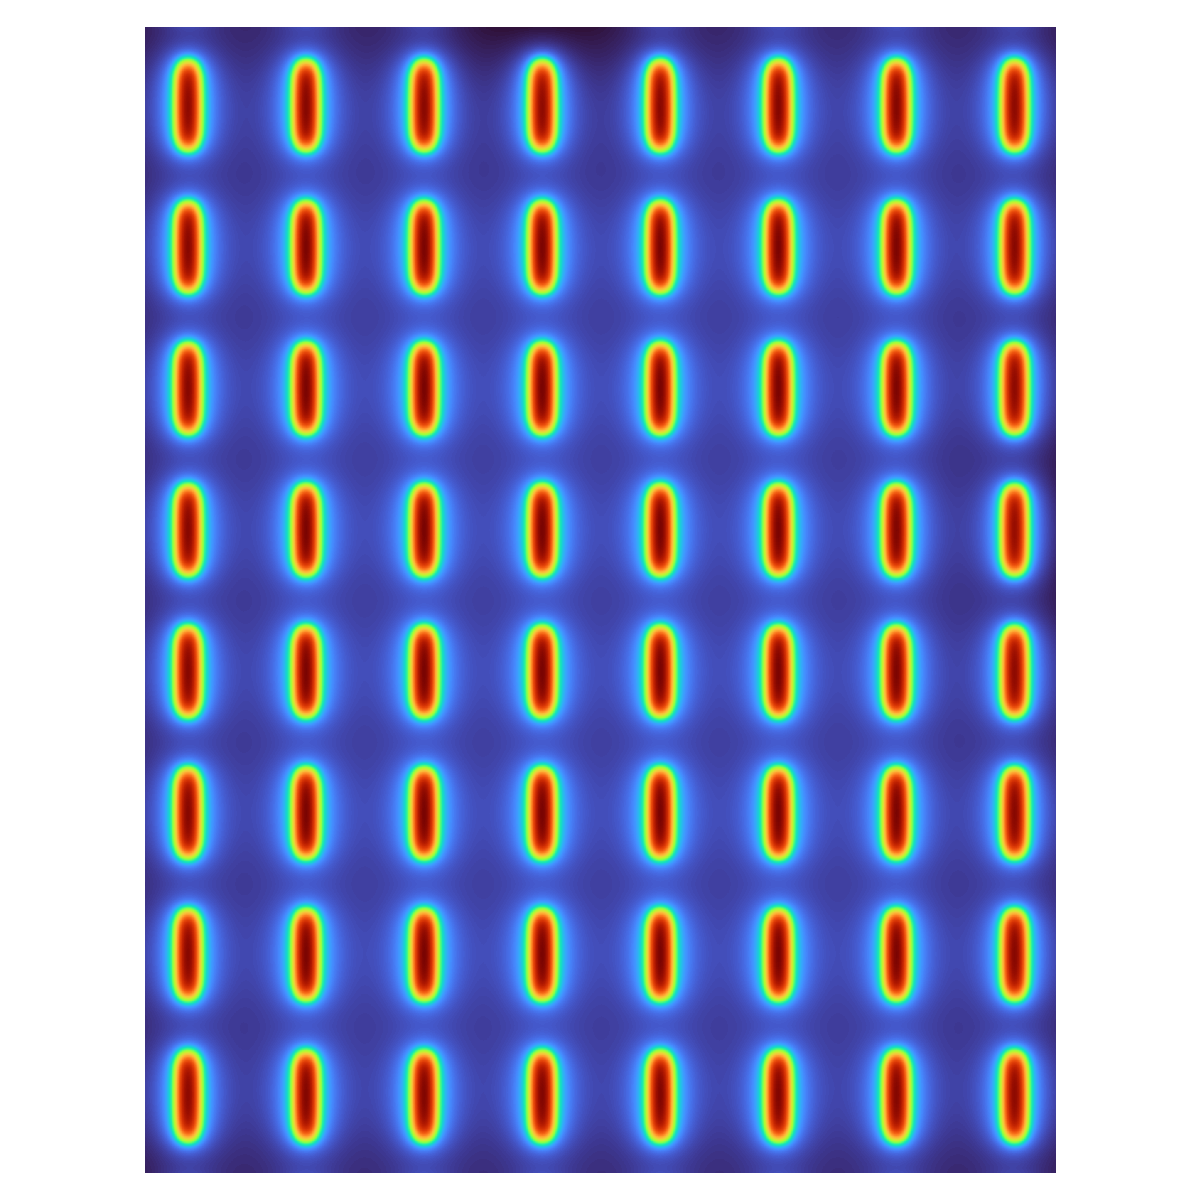

In [6]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi = 300)
plt.imshow(convolution_example[280:-280,280:-280], cmap="turbo")
plt.axis("off")
plt.tight_layout()
plt.savefig("convolution_example.svg")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

In [8]:
%config InlineBackend.figure_formats = ['svg']

In [9]:
# directory = 'C:/Users/Erez/Data/Diffraction/20231003_SB8_SB16_Cchip/data/MM_trenchwise/'
# GFPnoAdj = Path(directory).glob('GFP_noAdj*')
# GFP0 = pd.DataFrame({})
# for x in GFPnoAdj:
#     cell = pd.read_csv(x)
#     # print(cell)
#     GFP0 = pd.concat([GFP0, cell], ignore_index=True)
# GFP0.head(100)

In [10]:
directory = '../../mother_machine_bleedthrough/MM_trechwise/MM_trechwise_comp/'
RFP_1n = Path(directory + 'RFP_1n').glob('main*')
RFP1main = pd.DataFrame({})
for x in RFP_1n:
    cell = pd.read_csv(x)
    RFP1main = pd.concat([RFP1main, cell], ignore_index=True)
# RFP1main.head(100)
RFP_1n = Path(directory + 'RFP_1n').glob('side*')
RFP1side = pd.DataFrame({})
for x in RFP_1n:
    cell = pd.read_csv(x)
    RFP1side = pd.concat([RFP1side, cell], ignore_index=True)
RFP_1n = Path(directory + 'RFP_1n').glob('background_m*')
RFP1bgm = pd.DataFrame({})
for x in RFP_1n:
    cell = pd.read_csv(x)
    RFP1bgm = pd.concat([RFP1bgm, cell], ignore_index=True)
# RFP1main.head(100)
RFP_1n = Path(directory + 'RFP_1n').glob('background_s*')
RFP1bgs = pd.DataFrame({})
for x in RFP_1n:
    cell = pd.read_csv(x)
    RFP1bgs = pd.concat([RFP1bgs, cell], ignore_index=True)

In [11]:
n1_ratio = ((RFP1main['Mean'].values - RFP1bgm['Mean'].values)/
            (RFP1side['I_nb'].values - RFP1bgs['Mean'].values)).tolist()

In [12]:
RFP_2n = Path(directory + 'RFP_2n').glob('main*')
RFP2main = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2main = pd.concat([RFP2main, cell], ignore_index=True)
RFP_2n = Path(directory + 'RFP_2n').glob('background_m*')
RFP2bgm = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2bgm = pd.concat([RFP2bgm, cell], ignore_index=True)

In [13]:
RFP_2n = Path(directory + 'RFP_2n').glob('side*a*')
RFP2sideA = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2sideA = pd.concat([RFP2sideA, cell], ignore_index=True)
    
RFP_2n = Path(directory + 'RFP_2n').glob('background_s*a*')
RFP2bgsA = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2bgsA = pd.concat([RFP2bgsA, cell], ignore_index=True)

RFP_2n = Path(directory + 'RFP_2n').glob('side*b*')
RFP2sideB = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2sideB = pd.concat([RFP2sideB, cell], ignore_index=True)

RFP_2n = Path(directory + 'RFP_2n').glob('background_s*b*')
RFP2bgsB = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2bgsB = pd.concat([RFP2bgsB, cell], ignore_index=True)
    
RFP2bgsA.head(100)

,Slice,Mean
0,1,108.56084
1,2,108.88360
2,3,108.98016
3,4,109.85847
4,5,108.93651
...,...,...
83,11,107.88947
84,12,108.08685
85,13,106.75088
86,14,106.98772


In [14]:
n2_ratio = ((RFP2main['Mean'].values - RFP2bgm['Mean'].values)/
            (((RFP2sideA['Mean'].values - RFP2bgsA['Mean'].values) +
              (RFP2sideB['Mean'].values - RFP2bgsB['Mean'].values))/2)).tolist()

In [15]:
print(n1_ratio)
# print(n2_ratio)

[0.0008549682642872368, 0.0006934456222117833, 0.002263366020492116, 0.0010626756524075018, 0.0003362467389085423, -0.0002677891233603787, 0.0005264436042270681, 0.0012886506880802834, 0.0022564505955698995, 0.000908928216159496, 0.0017476990556902564, 4.765660648856895e-05, 0.0010305546029621792, 0.002512686436264809, 0.0011839838603553907, 0.002838024133707677, 0.0024712236056185877, 0.0019698867487805785, -0.00014108973885343533, 0.004634789107397238, 0.0006772455604476502, 0.003792729507486894, 0.0043941890320083055, 0.0018443884580798407, 0.004871510205294065, 0.005550896870982577, 0.0033009712542525485, 0.0013348517874061184, 0.003661033455690253, 0.0010507253036668056, 0.0006352930150825448, 0.0009825061198377974, 0.0014732115236697706, 0.00051948506294136, 0.00045152781192655736, -0.0007000955143302206, -0.0002902283565778485, -0.0010649062848635572, -7.807751600224815e-05, -0.0007479042052830482, 4.0461690465946724e-05, 0.0008338634907911827, -0.001481013158862992, 0.000177008

In [16]:
trench_diff = pd.DataFrame({"Normalised Ratio": n1_ratio + n2_ratio,
                            "Fluo Neighbour": ["One Adjacent Trench"] * len(n1_ratio) + 
                                              ["Two Adjacent Trench"] * len(n2_ratio)})

In [17]:
trench_diff

,Normalised Ratio,Fluo Neighbour
0,0.000855,One Adjacent Trench
1,0.000693,One Adjacent Trench
2,0.002263,One Adjacent Trench
3,0.001063,One Adjacent Trench
4,0.000336,One Adjacent Trench
...,...,...
170,-0.000582,Two Adjacent Trench
171,0.001345,Two Adjacent Trench
172,-0.000744,Two Adjacent Trench
173,-0.000693,Two Adjacent Trench


In [18]:
trench_diff["pc overestimation"] = trench_diff["Normalised Ratio"] * 100

Text(0.5, 1.0, 'Trench-wise comparison (RFP)')

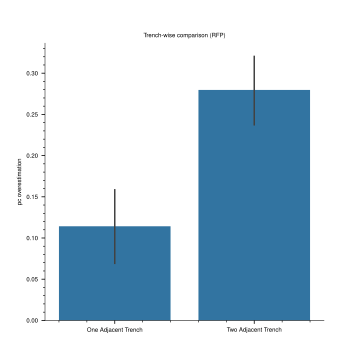

In [19]:
plt.figure(figsize=(5,5))
bar_plot = sns.barplot(data = trench_diff, x='Fluo Neighbour', y='pc overestimation')
# bar_plot.set_ylim(100, 120)
bar_plot.set_xlabel("")
bar_plot.set_title("Trench-wise comparison (RFP)")
# plt.show()
#plt.savefig(directory + '/trench-wise.pdf')

In [20]:
directory2 = 'MM_withintrench.'
RFP_d = Path(directory2).glob('*2*')
RFP_df = pd.DataFrame({})
for x in RFP_d:
    print(x)
    cell = pd.read_csv(x)
    RFP_df = pd.concat([RFP_df, cell], ignore_index=True)
RFP_df.head(10)

""


In [21]:
RFP_df = pd.read_csv("../../mother_machine_bleedthrough/bleedthrough_in_trench_2.csv")

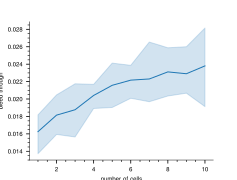

In [22]:
sns.lineplot(data=RFP_df, x='number_of_cells', y='bleed_through')
plt.show()

In [23]:
RFP_df["pc overestimation"] = RFP_df["bleed_through"] * 100

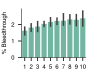

In [51]:
fig, ax = plt.subplots(1,1, figsize=(1.2,1.), dpi = 200)
sns.barplot(data=RFP_df, x='number_of_cells', y='pc overestimation', color = sns.color_palette("Set2")[0], ax = ax)
ax.set_ylabel("\% Bleedthrough")
ax.set_xlabel("Number of additional cells in trench")
#plt.suptitle("Effect of additional cells in mother machine trench", size=6)
fig.subplots_adjust(left=0.25, bottom = 0.2, right = 1)
plt.minorticks_off()
plt.savefig("mother_machine_cell_number.svg")
# plt.show()
#plt.savefig(directory2 + '/vertical_bleed_through.pdf')

In [52]:
fig, ax = plt.subplots(1,1, figsize=(0.4,1.), dpi = 200)
y_data = [0.29, 0.27, 2.25]
distance_data = [17, 10, 4]
sns.barplot(x=distance_data,y=y_data)
plt.xlabel("Trench spacing ($\mu m$)")
plt.ylabel("\% Bleedthrough")
fig.subplots_adjust(left=0.25, bottom = 0.2, right = 1)
plt.minorticks_off()

plt.savefig("side_trench_contribution.svg")
